In [1]:
# import shapely
# import geopandas as gpd
import pandas as pd
import numpy as np
# import plotly
# import contextily as cx
# import json
# import shapely
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import matplotlib.lines as lines

In [2]:
df = pd.read_csv("../data/blocks_data_merged.csv")

## K means clustering

In [3]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.

# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
data = df.loc[:, ['median_age', 'nearest_hospital_dist', 'nearest_hospital_bed_per_thousand', 'nearest_firestation_dist']]

array([[<Axes: xlabel='median_age', ylabel='median_age'>,
        <Axes: xlabel='nearest_hospital_dist', ylabel='median_age'>,
        <Axes: xlabel='nearest_hospital_bed_per_thousand', ylabel='median_age'>,
        <Axes: xlabel='nearest_firestation_dist', ylabel='median_age'>],
       [<Axes: xlabel='median_age', ylabel='nearest_hospital_dist'>,
        <Axes: xlabel='nearest_hospital_dist', ylabel='nearest_hospital_dist'>,
        <Axes: xlabel='nearest_hospital_bed_per_thousand', ylabel='nearest_hospital_dist'>,
        <Axes: xlabel='nearest_firestation_dist', ylabel='nearest_hospital_dist'>],
       [<Axes: xlabel='median_age', ylabel='nearest_hospital_bed_per_thousand'>,
        <Axes: xlabel='nearest_hospital_dist', ylabel='nearest_hospital_bed_per_thousand'>,
        <Axes: xlabel='nearest_hospital_bed_per_thousand', ylabel='nearest_hospital_bed_per_thousand'>,
        <Axes: xlabel='nearest_firestation_dist', ylabel='nearest_hospital_bed_per_thousand'>],
       [<Axes: xlabel

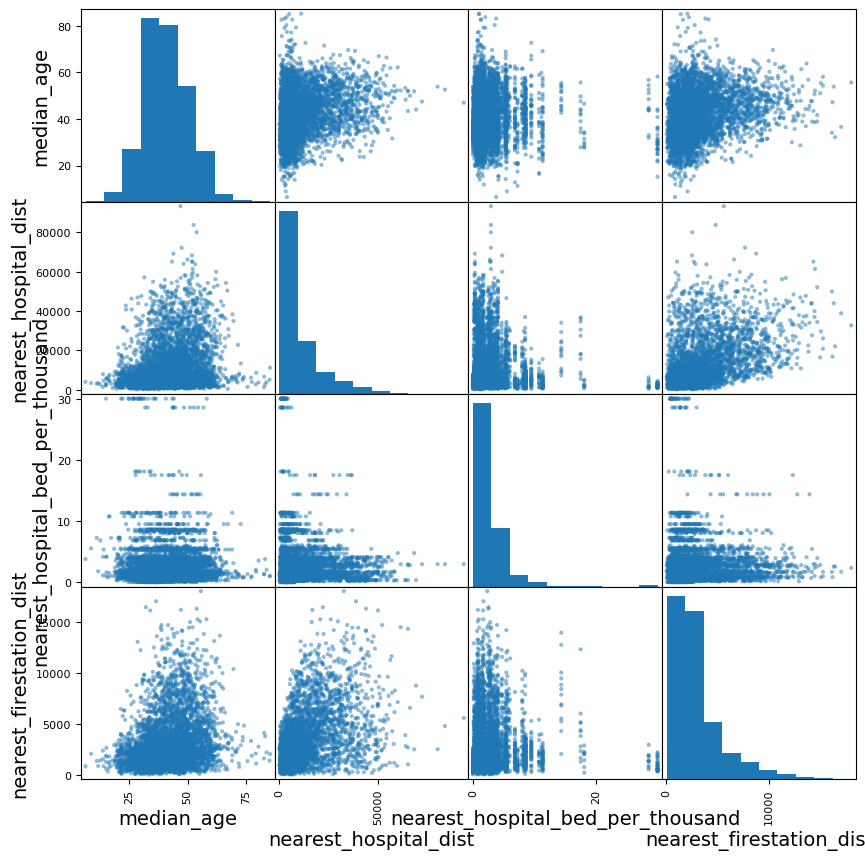

In [5]:
scatter_matrix(data[list(data)], figsize=(10,10))

In [6]:
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),  # refer to https://stackoverflow.com/questions/54836051/pipeline-ordinalencoder-valueerror-found-unknown-categories
])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(data.select_dtypes(include="number").columns)),
        ("cat", cat_pipeline, list(data.select_dtypes(include="object").columns)),
    ])

df = full_pipeline.fit_transform(data)

In [7]:
df.shape

(5554, 4)

In [8]:
from sklearn.cluster import KMeans

num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=0)
kmeans.fit(df)

KMeans(n_clusters=6, n_init='auto', random_state=0)

In [9]:
scaled_data = pd.DataFrame(df)
scaled_data.columns = data.columns
df_clustered = pd.merge(pd.DataFrame({"cluster": kmeans.labels_}), 
                        scaled_data.rename(columns=lambda x: x+"_scaled"), left_index=True, right_index=True)
report = df_clustered.groupby("cluster").agg(['mean', 'std']).T
report

cluster                                               0         1         2  \
median_age_scaled                        mean  0.915815 -0.091691  0.603868   
                                         std   0.693795  0.875657  0.942288   
nearest_hospital_dist_scaled             mean -0.258219 -0.406955  2.456693   
                                         std   0.470913  0.488078  0.962914   
nearest_hospital_bed_per_thousand_scaled mean -0.167555  1.642139 -0.242008   
                                         std   0.433436  0.640665  0.431191   
nearest_firestation_dist_scaled          mean -0.194258 -0.346884  0.305581   
                                         std   0.540026  0.513843  0.791652   

cluster                                               3         4         5  
median_age_scaled                        mean  0.556532 -0.505722 -0.720367  
                                         std   0.804600  1.054593  0.546951  
nearest_hospital_dist_scaled             mean  0.993732 -0.466928 -0.419235  
                                         std   0.921948  0.817883  0.371714  
nearest_hospital_bed_per_thousand_scaled mean -0.032226  7.118839 -0.279379  
                                         std   0.655854  1.723004  0.375065  
nearest_firestation_dist_scaled          mean  2.240536 -0.525014 -0.397775  
                                         std   0.957869  0.538354  0.470544

In [10]:
df_clustered.to_csv("../data/blocks_clustered.csv")

In [11]:
df_clustered

,cluster,median_age_scaled,nearest_hospital_dist_scaled,nearest_hospital_bed_per_thousand_scaled,nearest_firestation_dist_scaled
0,2,2.286328,3.874098,-0.423194,-0.119988
1,2,0.971715,3.625670,-0.423194,-0.504176
2,2,2.728037,3.635561,-0.423194,-0.988608
3,2,-1.131665,3.388776,-0.423194,-0.005443
4,2,1.287222,3.020078,-0.423194,0.267125
...,...,...,...,...,...
5549,5,-0.942361,-0.602661,0.346301,-0.819929
5550,5,-1.100114,-0.491576,0.346301,-1.024162
5551,0,0.687759,-0.487102,0.346301,-0.645106
5552,5,-0.511168,-0.376091,0.346301,-0.423435


In [12]:
df_clustered.columns = ['cluster', 'median\n age', 'hospital\n distance', 'hospital bed\n per thousand people', 'firestation\n distance']

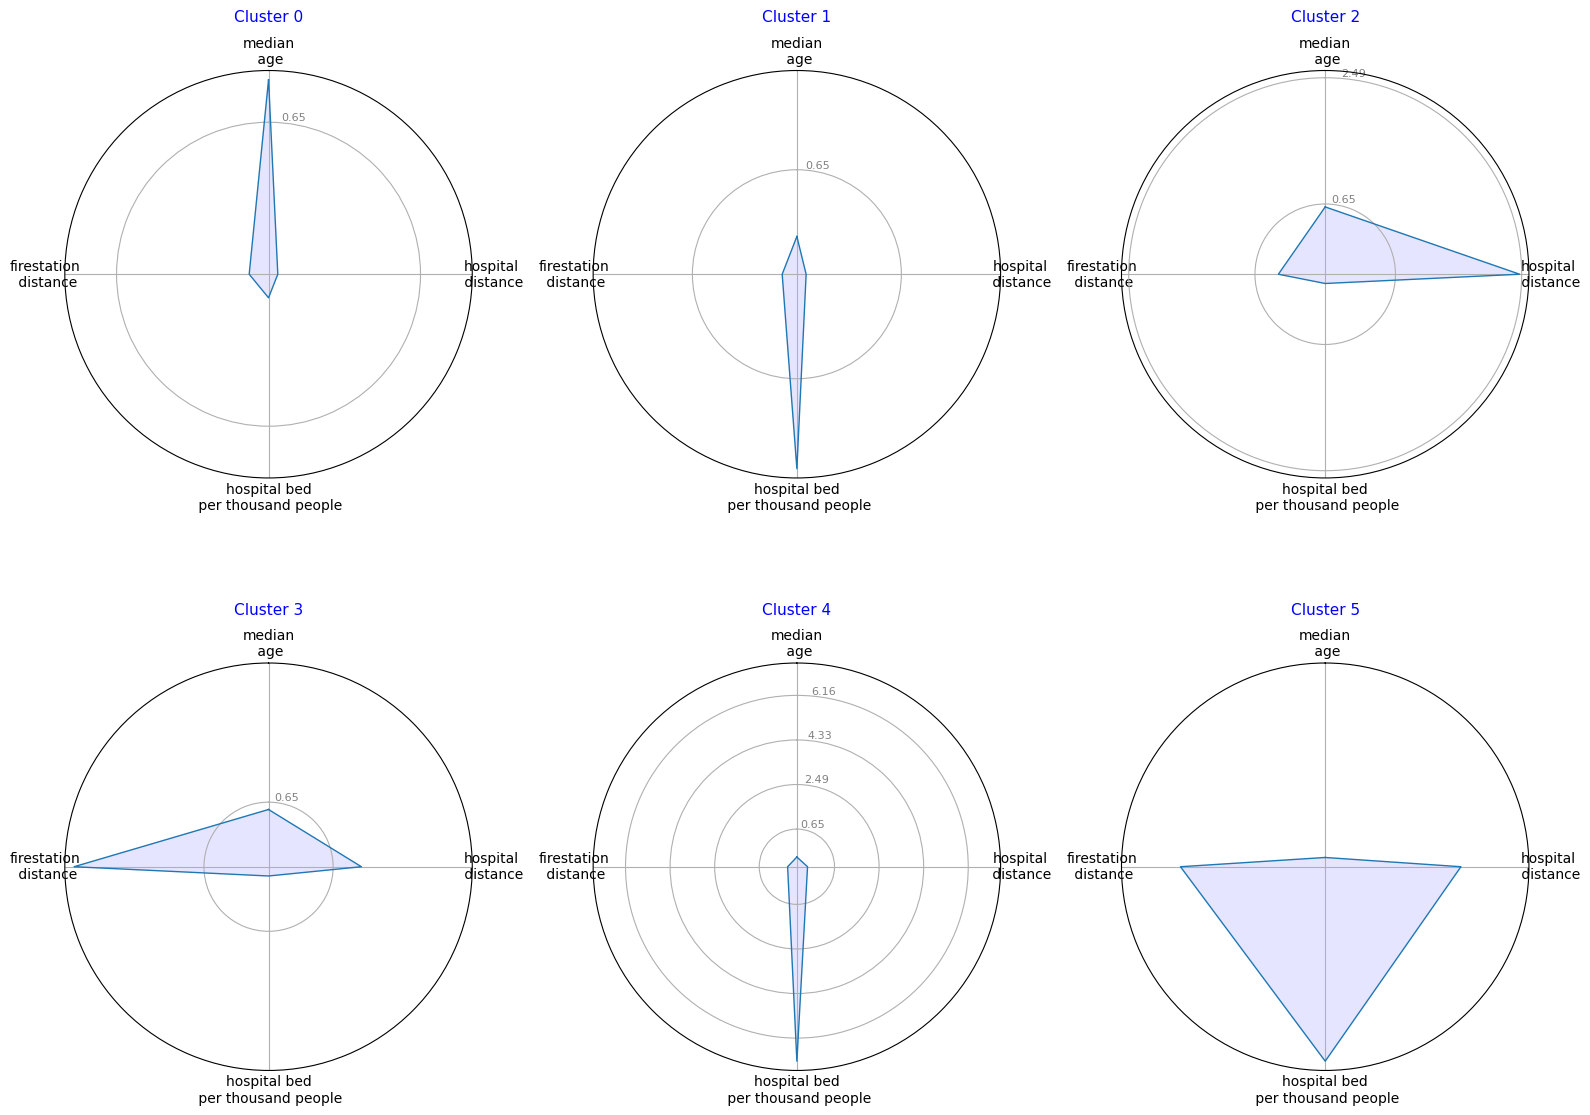

In [14]:
import matplotlib.pyplot as plt

# Function to create a radar chart for a given cluster
def create_radar_chart(df_clustered, cluster_number, axes, feature_ranges, ytick_styles):
    # Filter the data for the cluster
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_number].drop('cluster', axis=1)

    # Calculate the mean values for the cluster
    avg_values = cluster_data.mean().tolist()
    avg_values += avg_values[:1]  # Complete the loop for the radar chart

    # Number of variables we're plotting
    num_vars = len(cluster_data.columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Plot
    ax = axes.flatten()[cluster_number]
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable and add labels
    plt.sca(ax)  # Set the current axis to ax
    plt.xticks(angles[:-1], cluster_data.columns, color='black', size=10)

    # Draw ylabels for each feature
    for i, angle in enumerate(angles[:-1]):
        ax.set_rgrids(feature_ranges[i], angle=angle, labels=[str(round(val, 2)) for val in feature_ranges[i]], **ytick_styles)

    ax.plot(angles, avg_values, linewidth=1, linestyle='solid')
    ax.fill(angles, avg_values, 'b', alpha=0.1)

    ax.set_title('Cluster ' + str(cluster_number), size=11, color='blue', y=1.1)

# Determine the range of values for each feature
feature_ranges = [np.linspace(df_clustered[feature].min(), df_clustered[feature].max(), num=5)
                  for feature in df_clustered.columns if feature != 'cluster']

# Customize y-tick styles here (e.g., font size, color)
ytick_styles = {
    "fontsize": 8,
    "color": "grey",
}

# Set the number of clusters
num_clusters = df_clustered['cluster'].nunique()  # Adjust this according to your K-means clustering

# Create subplot axes in a 4x2 grid
fig, axes = plt.subplots(figsize=(16, 12), nrows=2, ncols=3, subplot_kw=dict(polar=True))

# Plot a radar chart for each cluster
for i in range(num_clusters):
    create_radar_chart(df_clustered, i, axes, feature_ranges, ytick_styles)

plt.tight_layout()
plt.show()